## Pipeline 的好處，可以從以下幾個關鍵點進行說明：

1. **簡化代碼**：
   - 使用 `Pipeline` 可以將數據預處理、特徵選擇、降維和模型訓練的步驟整合在一起，這樣就可用一行代碼來執行這些順序性的步驟，使代碼更加整潔、易於理解和維護。

2. **避免數據洩露**：
   - 在機器學習中，數據洩露是一個常見問題，特別是在數據預處理階段。`Pipeline` 確保預處理如標準化或正規化僅使用來自訓練數據的信息，並且每次交叉驗證的時候都是獨立處理，從而避免測試數據信息在模型訓練過程中被不當使用。

3. **便於進行模型選擇和調參**：
   - `Pipeline` 可以與 `GridSearchCV` 或 `RandomizedSearchCV` 結合使用，這讓我們可以同時對轉換器和預測器的參數進行調整。這種結合使用可以在模型選擇和超參數調整階段大大提高效率。

4. **提升模型的重用性和部署**：
   - 使用 `Pipeline` 可以將所有預處理步驟和預測模型封裝成單一對象，這使得模型從開發環境到生產環境的遷移更加順暢。此外，這種封裝還有助於確保在不同數據集上應用模型時，所有步驟都會按照相同的順序和方式執行。

5. **自動化工作流程**：
   - `Pipeline` 能夠自動處理在對新數據進行預測時所需的所有步驟，如轉換和預測，用戶只需調用 `fit` 和 `predict` 方法。這減少了手動錯誤的風險，提高了工作效率。

In [89]:
from sklearn.datasets import fetch_california_housing
# 加載數據集
data = fetch_california_housing()
# 打印數據集的描述
#print(data.DESCR)
X = data.data
y = data.target


| 欄位名稱     | 描述                                       |
|--------------|--------------------------------------------|
| MedInc       | 每個街區戶主的收入中位數，單位為萬美元          |
| HouseAge     | 每個街區中房屋的年齡中位數                       |
| AveRooms     | 每個街區中的平均房間數（總房間數除以房屋數）    |
| AveBedrms    | 每個街區中的平均臥室數（總臥室數除以房屋數）    |
| Population   | 街區的人口總數                                |
| AveOccup     | 每個家庭的平均人口數（街區人口除以房屋數）      |
| Latitude     | 街區的地理緯度                                |
| Longitude    | 街區的地理經度                                |

這些數據主要用於分析加州各地區的房價情況，其中「MedInc」作為收入指標，以及地理位置「Latitude」和「Longitude」對房價有重要影響。這些信息可以用於預測房屋價格或進行房地產市場的經濟研究。

在 `fetch_california_housing` 數據集中，目標變量（房價）的單位是「十萬美元」。這意味著數據集中的房價數值表示的是房屋價格以十萬美元為單位的值。例如，一個房價目標值為 3.0 表示該房屋的價格是 300,000 美元。

In [90]:
import pandas as pd
df = pd.read_csv("./california_housing_data.csv")
X = df.drop("target",axis=1)
y = df["target"]


In [91]:
from sklearn.model_selection import train_test_split
# 將數據分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 建立管道

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LinearRegression
pipline = Pipeline([
    ('scaler',StandardScaler()),
    ("regressor",LinearRegression())
])

In [93]:
pipline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [94]:
from sklearn.metrics import mean_squared_error
y_pred =  pipline.predict(X_test)
score =  mean_squared_error(y_test,y_pred)
print("score:",score)

score: 0.5289841670367208


## GridSearchCV and Pipline

In [95]:
from sklearn.datasets import fetch_california_housing
# 加載數據集
data = fetch_california_housing()
# 打印數據集的描述
#print(data.DESCR)
X = data.data
y = data.target

In [96]:
import pandas as pd
df = pd.read_csv("./california_housing_data.csv")
X = df.drop("target",axis=1)
y = df["target"]

In [97]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [98]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import Ridge
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ("ridge",Ridge())
])


In [99]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

In [100]:
parameters =  {
        "ridge__alpha":[0.1,1.0,10.0]
}
grid_search = GridSearchCV(pipeline,parameters,cv = 5)
grid_search.fit(X_train,y_train)

print("best_params:",grid_search.best_params_)


best_params: {'ridge__alpha': 10.0}


In [101]:
from sklearn.metrics import mean_squared_error
y_pred =  grid_search.predict(X_test)
score =  mean_squared_error(y_test,y_pred)
print(score)

0.5291107850754152


# KNN - K最近鄰居 - 分類

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv("./gene_expression.csv")

<Axes: xlabel='Gene One', ylabel='Gene Two'>

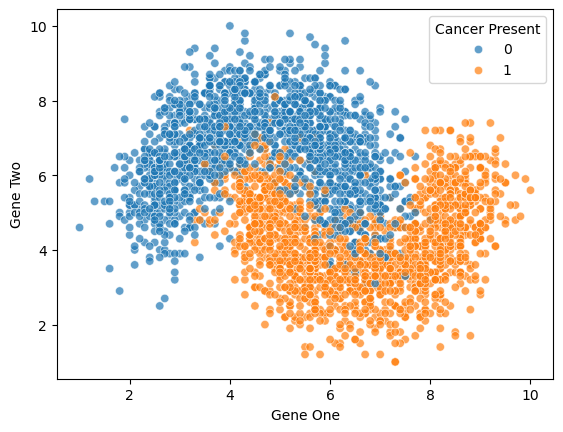

In [104]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7)

## Train|Test Split and Scaling Data

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [106]:
df.head()
X = df.drop("Cancer Present",axis=1)
y = df["Cancer Present"]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [108]:
scaler = StandardScaler()

In [109]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## 預測

In [111]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
y_pred = knn_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.9011111111111111

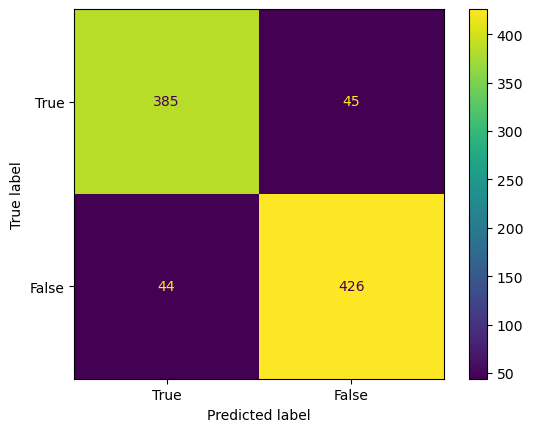

In [112]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,labels=[1,0],
                                        display_labels=['True','False'])

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



## Elbow Method for Choosing Reasonable K Values

**NOTE: This uses the test set for the hyperparameter selection of K.**

In [114]:
from sklearn.metrics import accuracy_score
test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    y_pred_test = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    

In [115]:
test_error_rates

[0.09888888888888892,
 0.09777777777777774,
 0.07333333333333336,
 0.0755555555555556,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.061111111111111116,
 0.05777777777777782,
 0.06222222222222218,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.05888888888888888,
 0.05777777777777782,
 0.05666666666666664,
 0.05555555555555558,
 0.05222222222222217,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.05777777777777782,
 0.05666666666666664]

Text(0.5, 0, 'K Value')

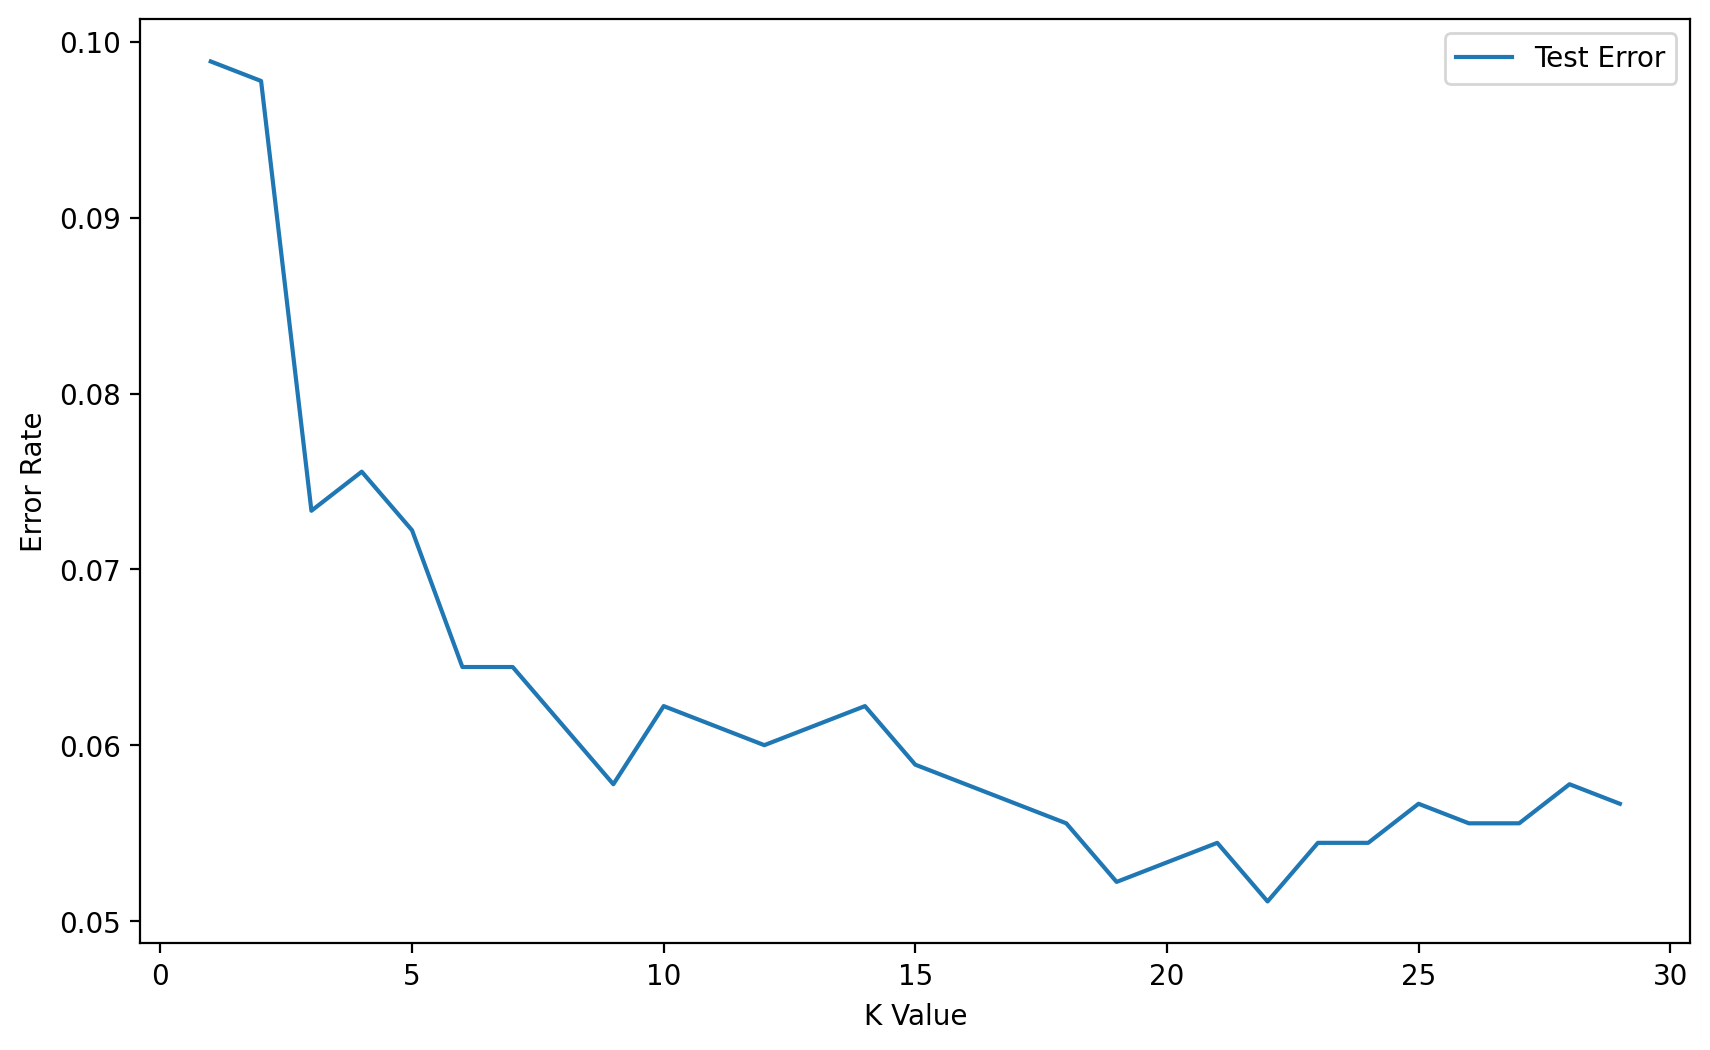

In [116]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

# Grid Search for K Value

In [126]:
df.head()
X = df.drop("Cancer Present",axis=1)
y = df["Cancer Present"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [127]:
scaler = StandardScaler()

In [128]:
knn = KNeighborsClassifier()

In [129]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [136]:
operations = [('scaler',scaler),('knn',knn)]

In [137]:
from sklearn.pipeline import Pipeline

In [138]:
pipe = Pipeline(operations)

In [139]:
from sklearn.model_selection import GridSearchCV
k_values = list(range(1,20))
param_grid = {'knn__n_neighbors':k_values}


In [140]:
cv_classfier =  GridSearchCV(pipe,param_grid,cv=5,scoring="accuracy")

In [141]:
cv_classfier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [142]:
cv_classfier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

## 最終模型

In [143]:
scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=16)
operations = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(operations)
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=16))])

In [145]:
pipe_pred =  pipe.predict(X_test)


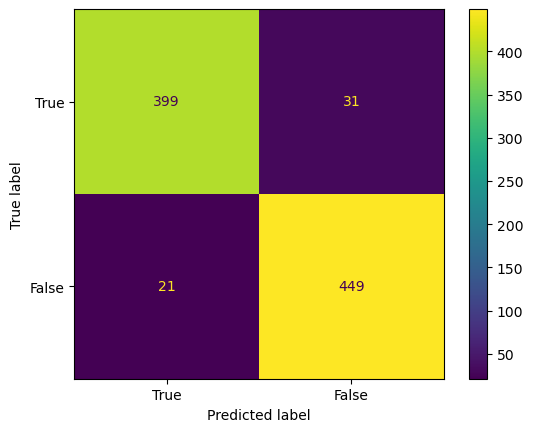

In [146]:
ConfusionMatrixDisplay.from_predictions(y_test,pipe_pred,labels=[1,0],
                                        display_labels=['True','False'])

## SVM

## gamma值的理解

- **gamma值越大**：
  - 模型會更加關注訓練數據中非常接近的資料點。
  - 因為模型更緊密地擬合這些局部數據，所以可能會導致過擬合（overfitting）。

- **gamma值越小**：
  - 模型會考慮更廣泛的資料範圍，訓練時更多地關注整體數據分佈。
  - 因此，模型更均勻地適應數據，但可能會導致欠擬合（underfitting），因為它忽略了數據中的一些細節。

這樣的表述能更清晰地傳達gamma值對模型的影響。

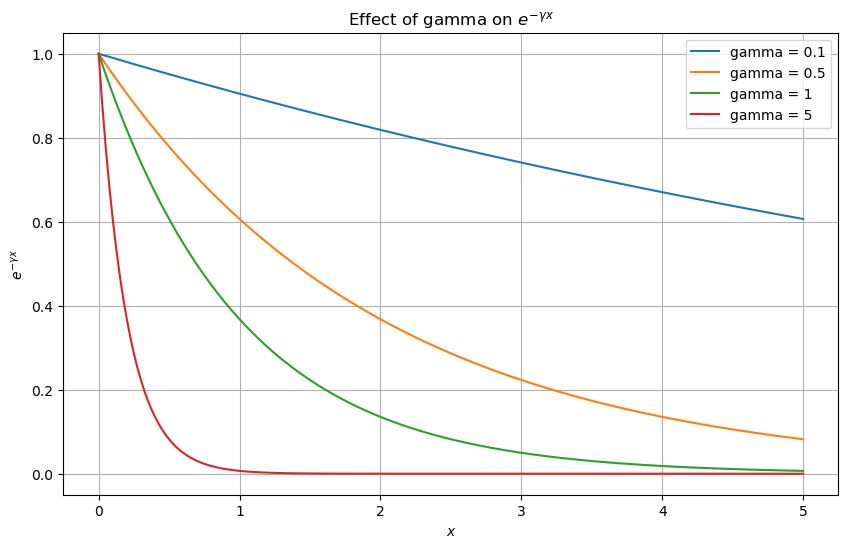

In [150]:
import numpy as np
import matplotlib.pyplot as plt

# 定義 gamma 值
gamma_values = [0.1, 0.5, 1, 5]

# 定義 x 值範圍
x = np.linspace(0, 5, 400)

# 創建圖形
plt.figure(figsize=(10, 6))

# 繪製不同 gamma 值對應的 e^(-gamma * x) 曲線
for gamma in gamma_values:
    y = np.exp(-gamma * x)
    plt.plot(x, y, label=f'gamma = {gamma}')

# 添加圖例和標籤
plt.title('Effect of gamma on $e^{-\gamma x}$')
plt.xlabel('$x$')
plt.ylabel('$e^{-\gamma x}$')
plt.legend()
plt.grid(True)

# 顯示圖形
plt.show()


# 探索支持向量機（Support Vector Machines, SVM）

**注意：在這個範例中，我們將探討算法，所以我們將跳過數據標準化和訓練/測試拆分，而是看看各種參數如何改變SVM（在分類中最容易視覺化效果）**

[關於SVM的優秀論文鏈接](http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=4448154647BC7B10C991CEF2236BBA38?doi=10.1.1.114.4288&rep=rep1&type=pdf)
* A tutorial on support vector regression by ALEX J. SMOLA and BERNHARD SCHOLKOPF

## SVM - 分類

### 簡介
支持向量機（Support Vector Machines，SVM）是一種監督學習模型，通常用於分類和回歸分析。SVM的目標是找到一個最佳的超平面來將數據點分開，這個超平面可以最大化邊界（即支持向量）。

### 參數
在探索SVM的過程中，有幾個重要的參數需要理解和調整：

1. **C參數（正則化參數）**：C值控制的是誤分類的懲罰程度。較小的C值會產生一個更平滑的決策邊界，但可能會容忍更多的誤分類；較大的C值會努力正確分類所有訓練樣本，但可能導致過擬合。

2. **核函數（Kernel Function）**：核函數將低維空間的數據轉換到高維空間，使得數據在高維空間中更容易分離。常見的核函數包括線性核、多項式核和高斯徑向基核（RBF核）。

3. **γ參數（gamma）**：γ參數適用於多項式核和RBF核。γ值決定了單個訓練樣本的影響範圍。較大的γ值會使得決策邊界更加複雜，較小的γ值會使得決策邊界更平滑。


In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 數據

這裡顯示的數據模擬了一項醫學研究，在該研究中，被病毒感染的小鼠被給予不同劑量的兩種藥物，然後在兩週後檢查它們是否仍然被感染。根據這些數據，我們的目標是創建一個分類模型，預測（給定兩個劑量測量值）小鼠是否仍然會被病毒感染。

In [152]:
df = pd.read_csv("./mouse_viral_study.csv")
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

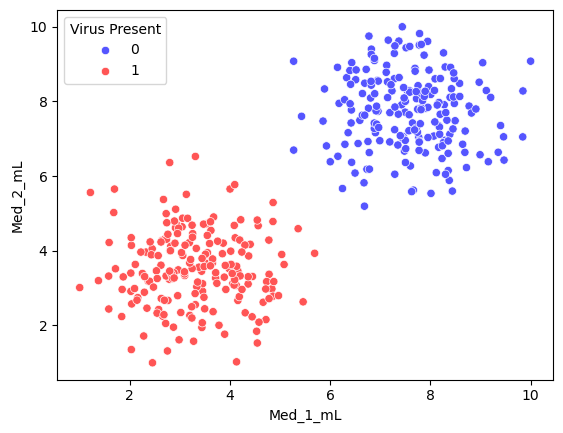

In [153]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',
                data=df,palette='seismic')

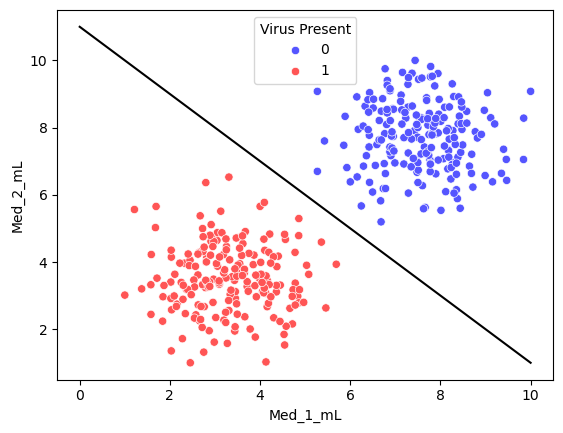

In [154]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',palette='seismic',data=df)

# We want to somehow automatically create a separating hyperplane ( a line in 2D)

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'k')

In [155]:
from sklearn.svm import SVC
y = df["Virus Present"]
X =  df.drop("Virus Present",axis=1)

model = SVC(kernel="linear",C = 1000)
model.fit(X,y)

SVC(C=1000, kernel='linear')

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


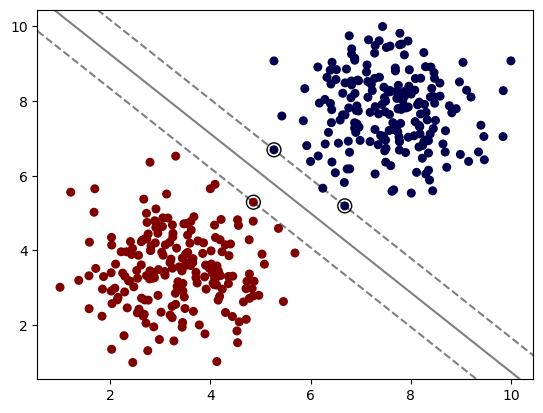

In [157]:
from svm_margin_plot import plot_svm_boundary
plot_svm_boundary(model,X,y)# 繪製SVM決策邊界

圖展示了使用支持向量機（SVM）模型對數據進行分類的結果。圖中有兩組明顯分離的數據點，紅色和藍色分別代表兩個不同的類別。圖中的線條代表了SVM模型的決策邊界和支持向量。

具體說明如下：

1. **決策邊界（實線）**：圖中的實線是SVM模型找到的最佳分離超平面。在二維空間中，這條線將數據點分為兩個不同的區域，每個區域代表一個類別。

2. **支持向量（圈出來的點）**：有幾個數據點被圈出來了，這些點就是支持向量。支持向量是距離決策邊界最近的數據點，它們對決策邊界的位置有著決定性的影響。

3. **邊界線（虛線）**：圖中的兩條虛線表示決策邊界的邊界線，它們是根據支持向量的位置來確定的。這些虛線之間的距離就是所謂的「邊界」，SVM的目標是最大化這個邊界，以便更好地將兩類數據分開。


## 設定較小的C

如果 C 很大，這條線會非常努力去確保每一個點都分對邊（藍色和紅色的點完全分開），但這樣可能會讓線變得很彎曲。

如果 C 很小，這條線會允許一些點分錯邊，因為我們希望線可以更平滑，不用那麼精確。

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


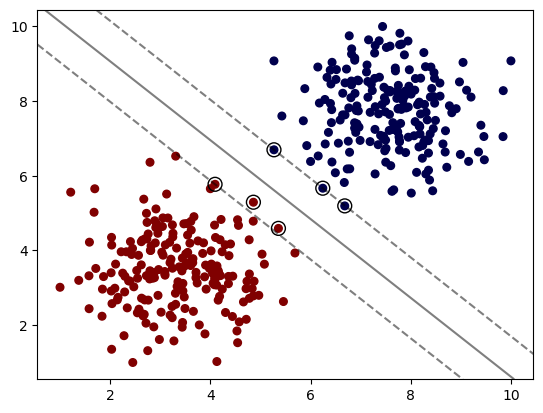

In [182]:
model = SVC(kernel='linear', C=0.5)
model.fit(X, y)
plot_svm_boundary(model,X,y)

## 非線性分類

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


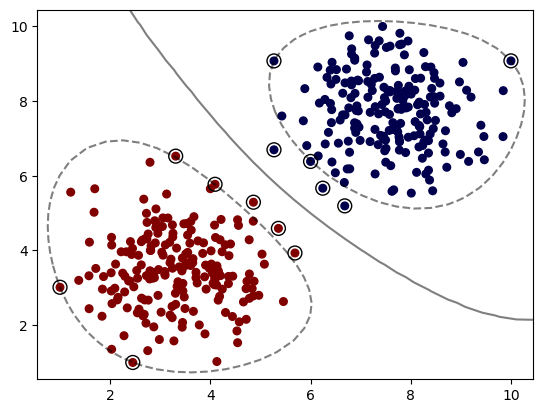

In [183]:
model = SVC(kernel='rbf', C=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

## gamma值的理解

- **gamma值越大**：
  - 模型會更加關注訓練數據中非常接近的資料點。
  - 因為模型更緊密地擬合這些局部數據，所以可能會導致過擬合（overfitting）。

- **gamma值越小**：
  - 模型會考慮更廣泛的資料範圍，訓練時更多地關注整體數據分佈。
  - 因此，模型更均勻地適應數據，但可能會導致欠擬合（underfitting），因為它忽略了數據中的一些細節。

這樣的表述能更清晰地傳達gamma值對模型的影響。

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


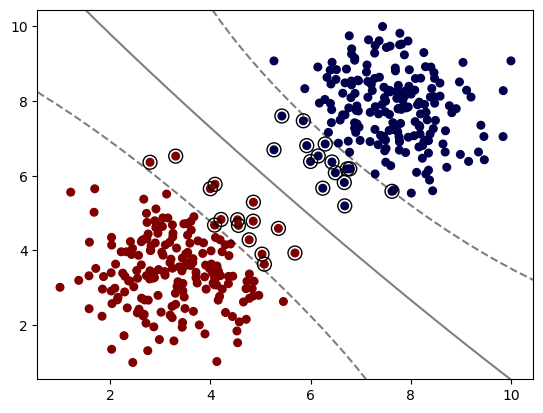

In [184]:
model = SVC(kernel='rbf', C=1,gamma=0.01)
model.fit(X, y)
plot_svm_boundary(model,X,y)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


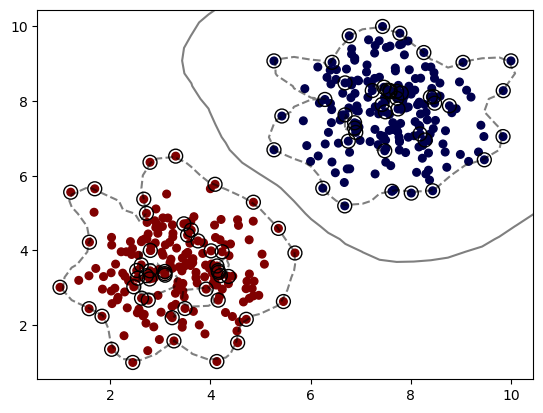

In [185]:
model = SVC(kernel='rbf', C=1,gamma=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

## 網格搜索

In [187]:
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)
grid.fit(X,y)
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

# Support Vector Machines
## SVM - Regression

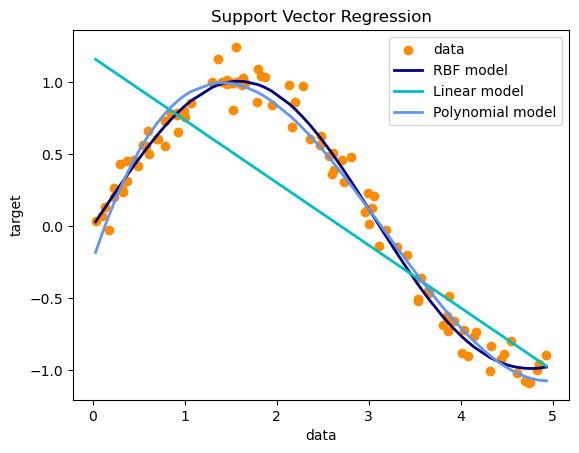

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# 生成示例數據
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(100) * 0.1

# 訓練 SVR 模型
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, epsilon=.1)
#poly 多項式核函數
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

# 擬合數據
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# 繪圖
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=2, label='RBF model')
plt.plot(X, y_lin, color='c', lw=2, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=2, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

# Scikit-Learn's Text Feature Extraction Options

In [190]:
text = ['This is a line',
           "This is another line",
       "Completely different line"]

## CountVectorizer


在使用 CountVectorizer 時，
指定 stop_words='english' 會自動移除英文中的常見停用詞（stop words），
例如 "this" 和 "is"。停用詞是一些在文本分析中不具有區分度的常見單詞，例如冠詞、連詞和一些代詞。這些單詞通常對文本的主題或意圖沒有太大的貢獻，所以在計算特徵時會被移除。

In [191]:
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer,CountVectorizer

In [192]:
cv = CountVectorizer()
cv = CountVectorizer(stop_words='english')#使用 CountVectorizer 計數詞頻：

text = ['This is a line',

           "This is another line",
           
       "Completely different line"]

In [200]:
counts = cv.fit_transform(text)
counts.todense()

matrix([[0, 0, 1],
        [0, 0, 1],
        [1, 1, 1]], dtype=int64)

'completely' 對應索引 0

'different' 對應索引 1

'line' 對應索引 2

In [201]:
cv.vocabulary_

{'line': 2, 'completely': 0, 'different': 1}

## TfidfTransformer

使用的是 CountVectorizer 和 TfidfTransformer 來計算 TF-IDF 特徵矩陣。

你可以將 TF-IDF 特徵矩陣理解為一張表格，行代表不同的文本（例如文章、段落），列代表不同的詞語。表格中的每個數字代表該詞語在該文本中的重要性。

In [204]:
tfidf_transformer = TfidfTransformer()
tfidf =  tfidf_transformer.fit_transform(counts)
tfidf.todense()

matrix([[0.        , 0.        , 1.        ],
        [0.        , 0.        , 1.        ],
        [0.65249088, 0.65249088, 0.38537163]])

### 資料來源

來源：https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

這些資料最初來自 Crowdflower 的「Data for Everyone」資料庫。

根據原始來源所述，

這是一個關於美國主要航空公司問題的情感分析工作。Twitter 數據是從 2015 年 2 月收集的，並且請求貢獻者首先將推文分類為正面、負面和中性，然後再分類負面原因（例如「航班延誤」或「服務粗魯」）。

#### 目標：建立一個機器學習算法來預測推文是正面、中性還是負面。在未來，我們可以使用這樣的算法自動閱讀並標記航空公司的推文，讓客服人員聯繫客戶。

In [205]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [207]:
df = pd.read_csv("./airline_tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: xlabel='airline', ylabel='count'>

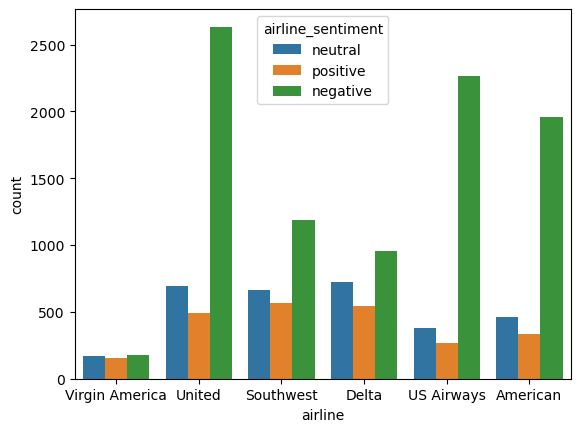

In [208]:
sns.countplot(data=df,x='airline',hue='airline_sentiment')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Bad Flight'),
  Text(1, 0, "Can't Tell"),
  Text(2, 0, 'Late Flight'),
  Text(3, 0, 'Customer Service Issue'),
  Text(4, 0, 'Flight Booking Problems'),
  Text(5, 0, 'Lost Luggage'),
  Text(6, 0, 'Flight Attendant Complaints'),
  Text(7, 0, 'Cancelled Flight'),
  Text(8, 0, 'Damaged Luggage'),
  Text(9, 0, 'longlines')])

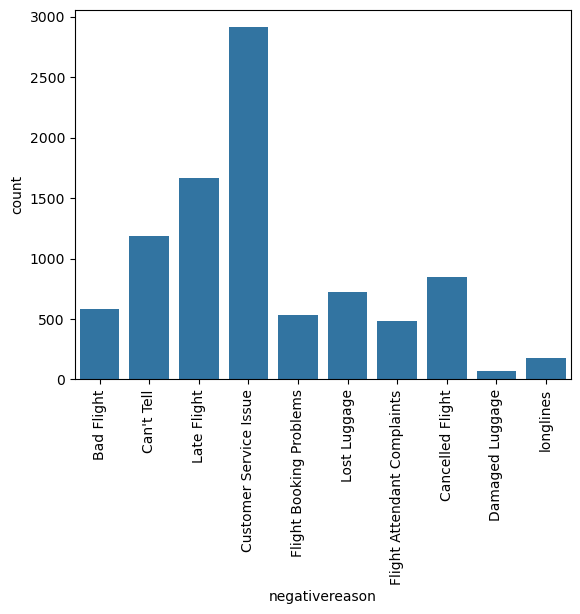

In [210]:
sns.countplot(data=df,x='negativereason')
plt.xticks(rotation=90)

## Features and Label

In [212]:
data = df[['airline_sentiment','text']]
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [213]:
y = df['airline_sentiment']
X = df['text']

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Vectorization

In [215]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [216]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [217]:
X_train_tfidf

<11712x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 107073 stored elements in Compressed Sparse Row format>

In [218]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)#由文字權重 推算情緒

MultinomialNB()

In [219]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test, preds))
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test_tfidf, y_test)

NB MODEL
              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



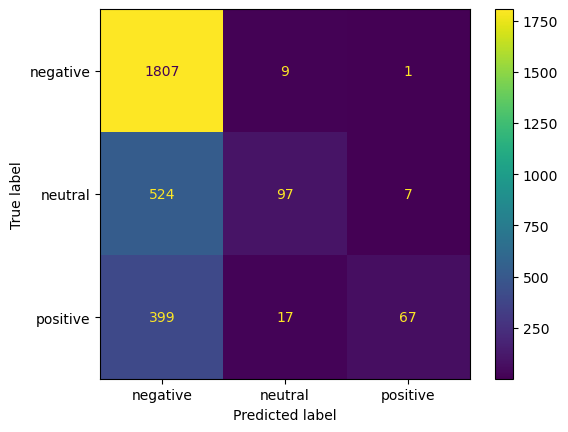

In [220]:
print("NB MODEL")
report(nb)

## 文字必須轉換成權重才能預測

In [221]:
tes = tfidf.transform(["@SouthwestAir thanks! Very "])
preds = nb.predict(tes)
preds
print(X_test.iloc[0])
print(preds)

@SouthwestAir thanks! Very excited to see it :D
['positive']
